In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("customerchurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop("customerID", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df = df.fillna(0)

In [6]:
df.replace({'No phone service':"No", 'No internet service':"No"},inplace=True)

In [7]:
df.replace({'No':0, 'Yes':1},inplace=True)

In [8]:
df.replace({'Male':0, 'Female':1},inplace=True)

In [9]:
df = pd.get_dummies(data = df , columns = ["InternetService","Contract","PaymentMethod"], drop_first = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [11]:
X = df.drop("Churn", axis = True)
y = df.Churn

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression(max_iter=100000)

In [20]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [21]:
lr.score(X_test, y_test)

0.8197303051809794

In [22]:
y_pred = lr.predict(X_train)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

In [26]:
cf = confusion_matrix(y_train, y_pred)

<AxesSubplot:>

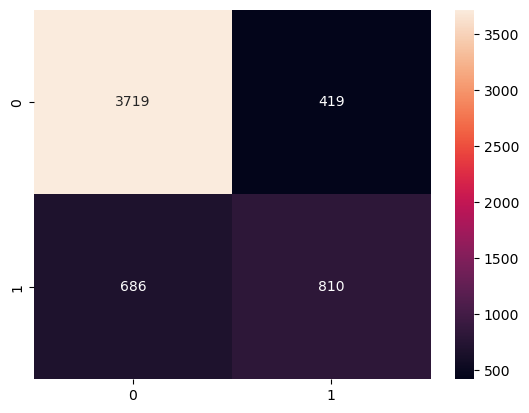

In [27]:
sns.heatmap(cf ,annot=True, fmt = 'd') 

In [28]:
df0 = df[df["Churn"]==0]
df1 = df[df["Churn"]==1]

In [29]:
df0.shape

(5174, 24)

In [30]:
df1.shape

(1869, 24)

In [31]:
reduced = df0.sample(df0.shape[0])

In [32]:
low = pd.concat([reduced,df1])

In [33]:
X_low = low.drop("Churn", axis = 1)
y_low = low.Churn

In [34]:
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(X_low, y_low, test_size=0.20, random_state=42)

In [35]:
lr.fit(X_low_train, y_low_train)
lr.score(X_low_test, y_low_test)

0.8026969481902059

In [36]:
y_low_pred = lr.predict(X_low_train)
y_low_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

<AxesSubplot:>

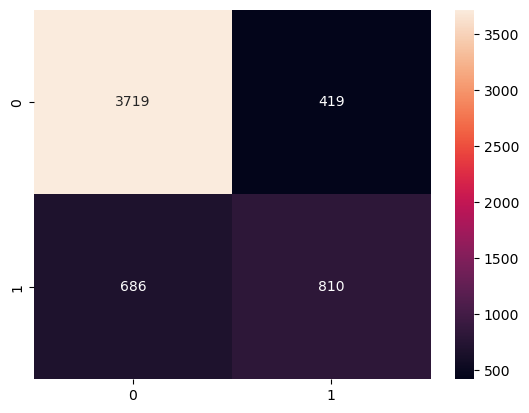

In [38]:
cf1 = confusion_matrix(y_low_train, y_low_pred)
sns.heatmap(cf ,annot=True, fmt = 'd')

In [39]:
increased = df1.sample(df1.shape[0], replace = True)

In [40]:
high = pd.concat([increased,df0])

In [41]:
X_high = high.drop("Churn", axis = 1)
y_high = high.Churn

In [42]:
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(X_high, y_high, test_size=0.20, random_state=42)

In [43]:
lr.fit(X_high_train, y_high_train)
lr.score(X_high_test, y_high_test)

0.794889992902768

In [45]:
y_high_pred = lr.predict(X_high_train)
y_high_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

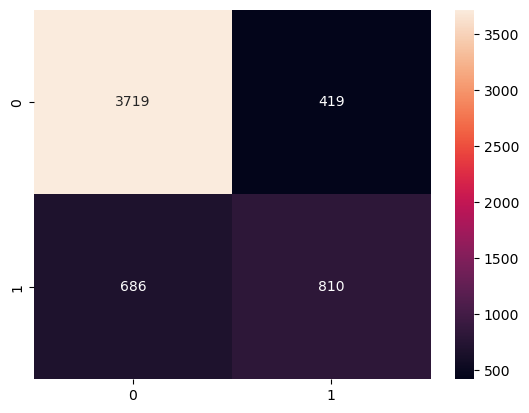

In [46]:
cf2 = confusion_matrix(y_high_train, y_high_pred)
sns.heatmap(cf ,annot=True, fmt = 'd')